In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from vistats import annotate_brackets

In [3]:
contents = np.arange(0, 50, 1).reshape((10, 5))

In [4]:
target_data_df = pd.DataFrame(
    contents, columns=["a", "b", "c", "d", "e"]
)
# if you load csv file
# target_data_df = pd.read_csv("<input_your_file_name>.csv")

In [5]:
# Calculating mean and standard error
means, sems = target_data_df.mean().values, target_data_df.sem().values

In [6]:
# input your asterisks.
asterisk_tuples = [(0, 1, "*"), (0, 2, "*"), (0, 3, "*"), (1, 2, '**'), (3, 4, "+"), (1, 3, '**'), (2, 4, "+")]
# asterisk_tuples = [(0, 1, "*"), (1, 2, "*")]

Text(0.5, 0, 'method')

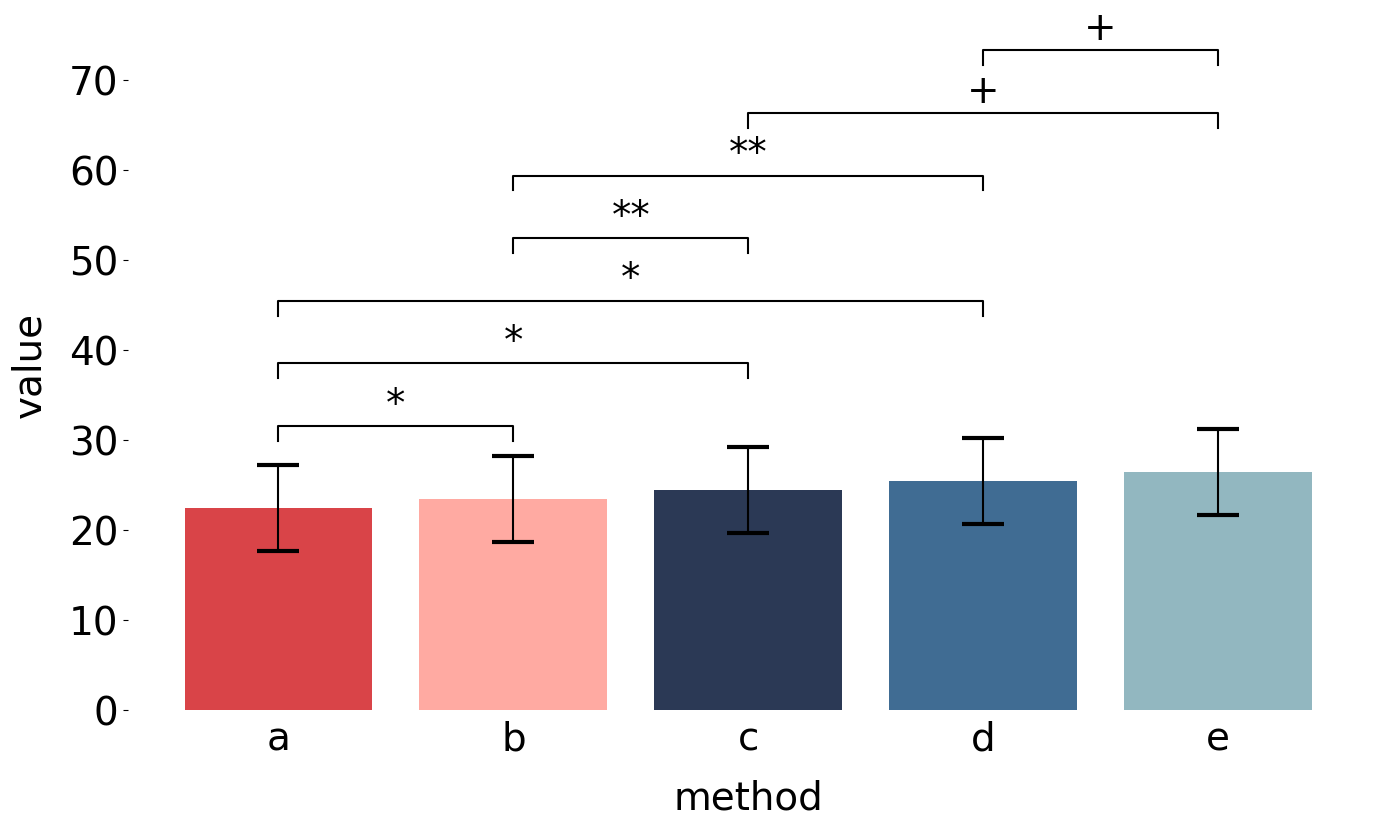

In [7]:
# You can use annotate_brackets like plt.bar, plt.plot, and etc. 
plt.figure(figsize=(16, 9))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(bottom=False, labelsize=28)
bars = np.arange(len(target_data_df.columns))
plt.bar(
    bars, means,
    tick_label=target_data_df.columns.tolist(),
    yerr=sems,
    capsize=15.0,
    error_kw={"capthick": 3.0},
    align='center',
    color=["#d94448", "#ffaaa2", "#2b3955", "#406c93", "#92b7c0"]
)

# run the function after plt.bar
annotate_brackets(
    asterisk_tuples, bars, means.tolist(), 
    yerr=sems.tolist(), fs=28
)

plt.ylabel("value", labelpad=15, fontsize=28)
plt.xlabel("method", labelpad=15, fontsize=28)

In [8]:
from vistats import boxplot_annotate_brackets
import seaborn as sns

import matplotlib
from matplotlib.font_manager import fontManager
fontManager.findfont("Times New Roman")

'C:\\Windows\\Fonts\\times.ttf'

In [9]:
sns.set(
    rc={
        "lines.linewidth": 3,
        "grid.linestyle": "--",
        "grid.color": "gray"
    }
)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = ['Times New Roman']
# plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["axes.facecolor"] = "#f7f7f7"
plt.rcParams["font.size"] = 24
print(plt.rcParams["figure.dpi"])
plt.rcParams["figure.dpi"] = 300

100.0


Text(0.5, 0, 'method')

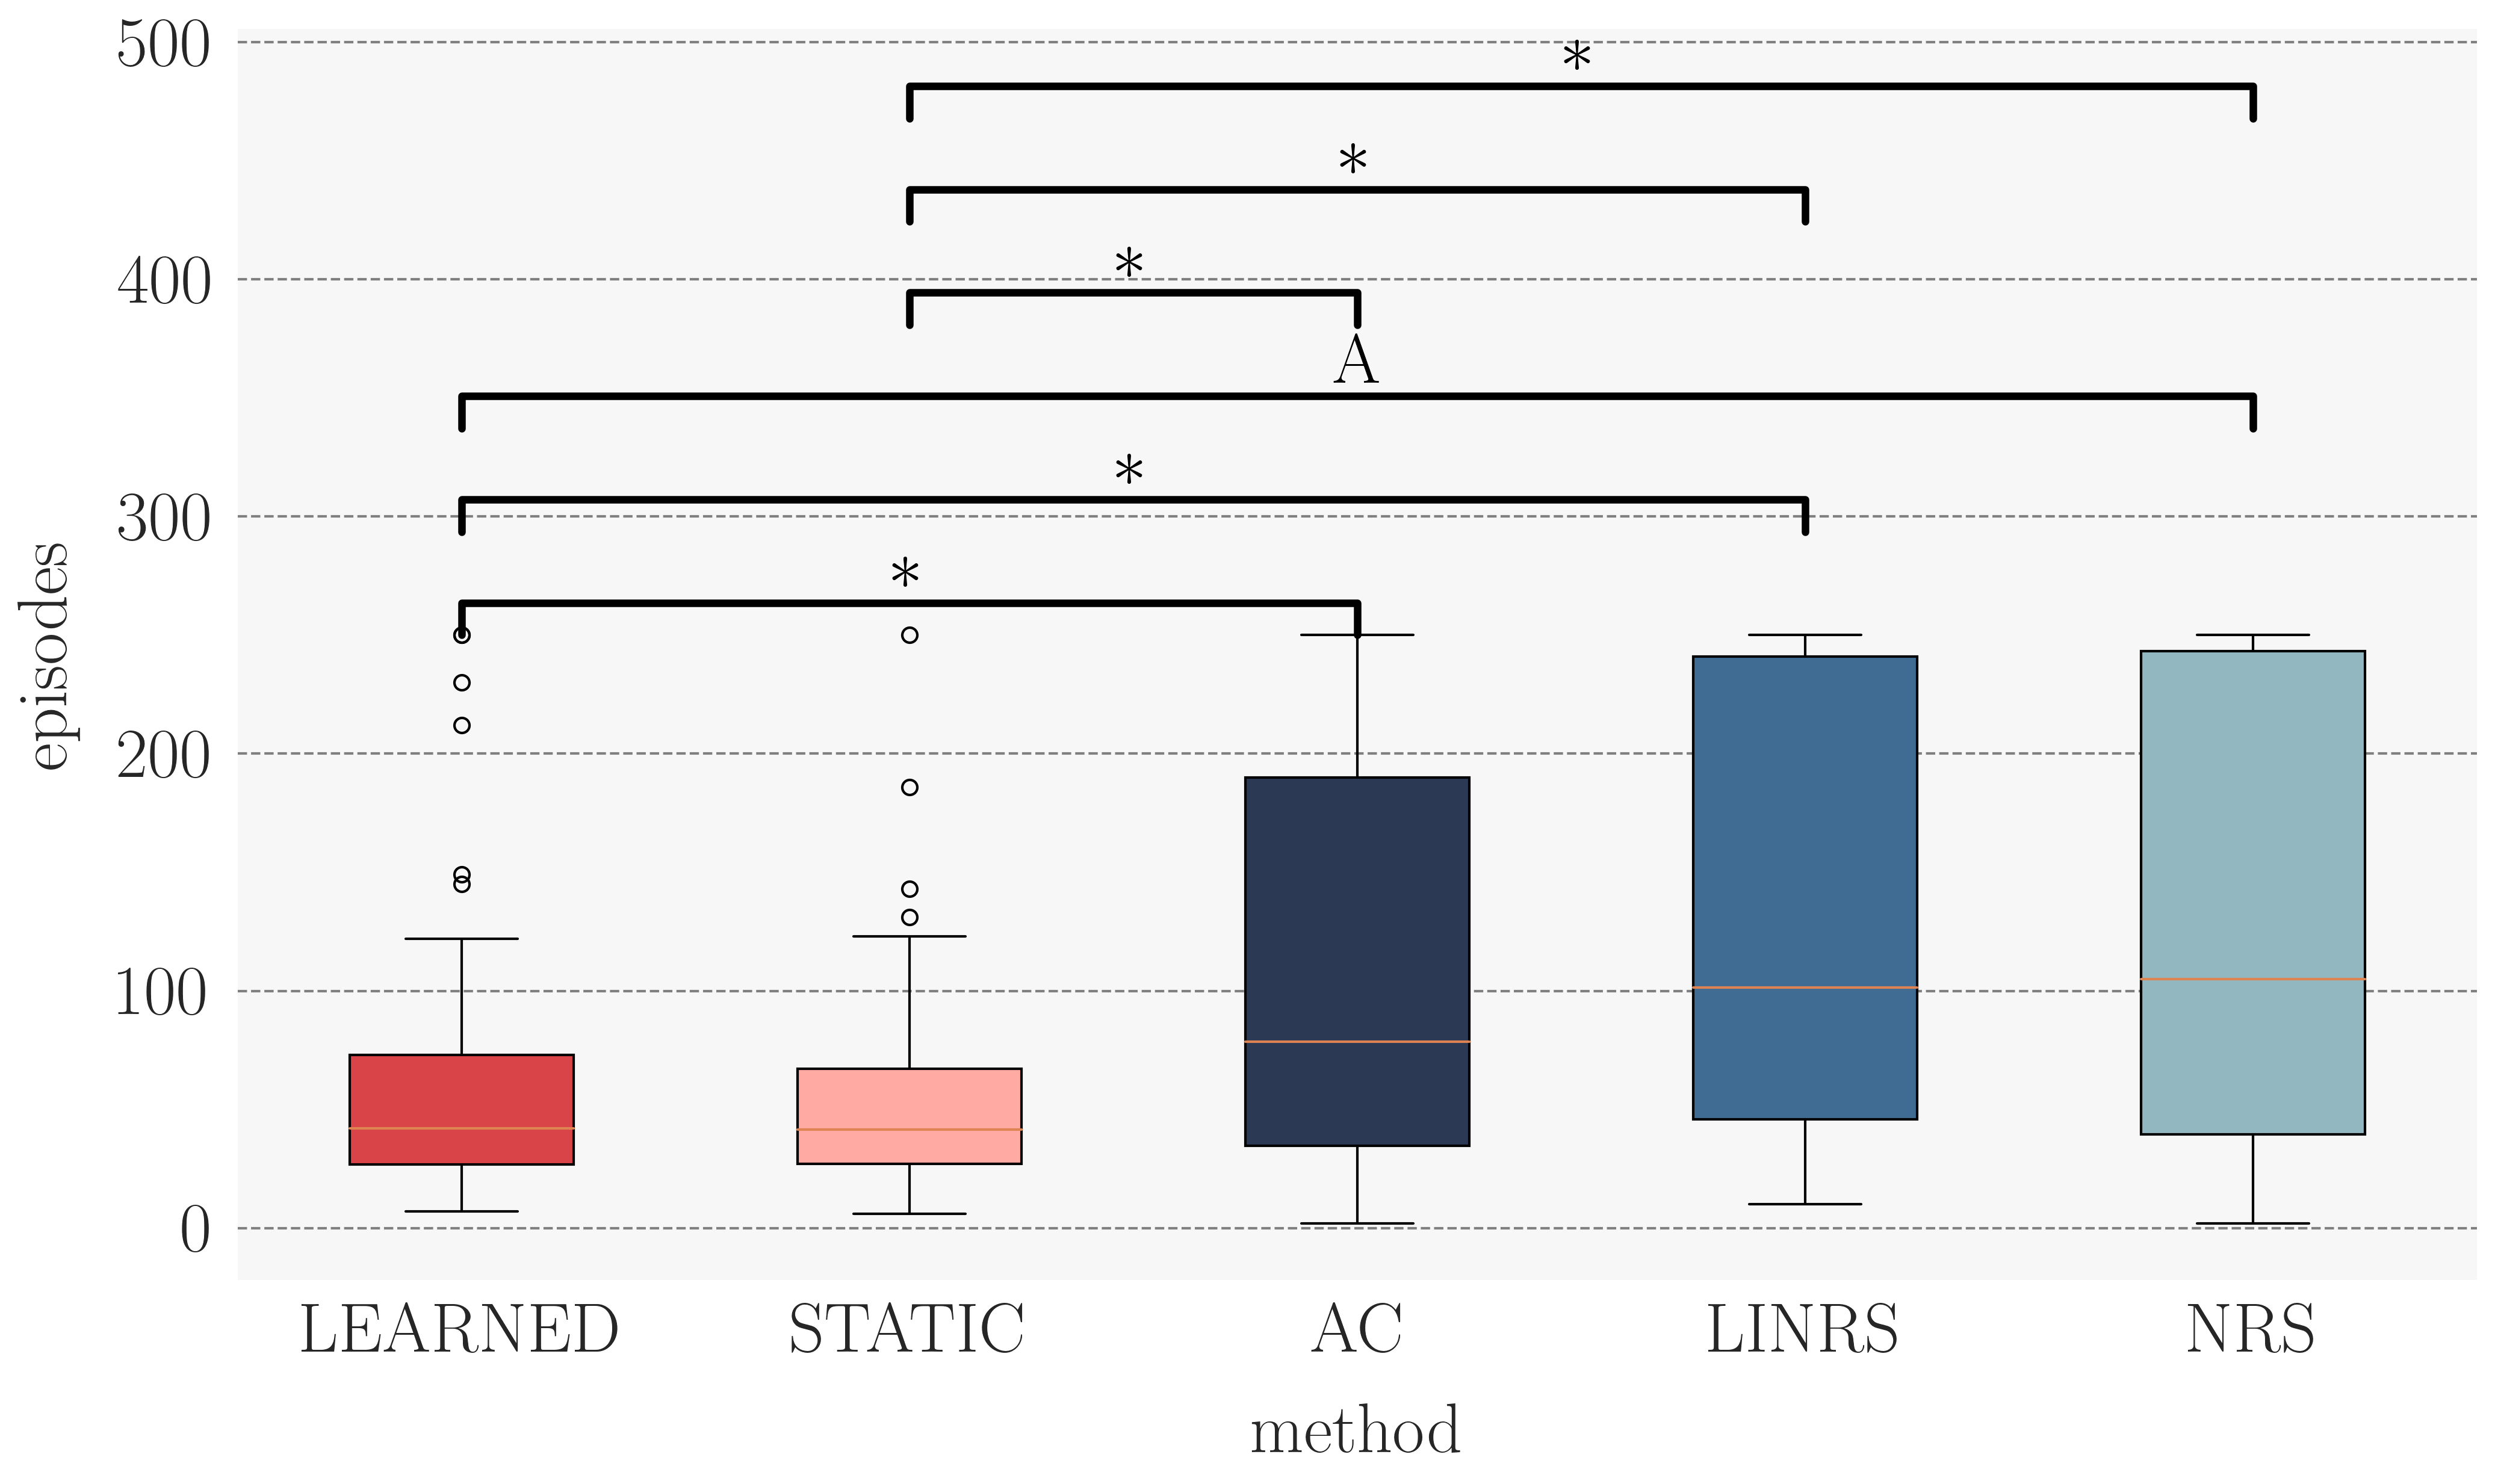

In [11]:
pinball_idx = np.array(
    [
        917, 405, 896, 173, 627, 454, 780, 490, 375, 466, 416,  72, 630,
        796,  61, 359, 621, 153, 908, 255,  43, 880,  68, 377, 281, 661,
        179, 314, 824, 438, 407, 784, 806,  87, 920, 856, 364, 741, 979,
        185, 784, 171, 291, 894, 876,   2, 190,  73, 176, 677, 281, 325,
        646, 442, 585,  15, 423, 218, 667, 711, 401, 735,  63, 962, 511,
        753, 422, 772, 677, 851,  10, 856, 491, 272, 202, 480, 667, 925,
        868,  68, 391, 431, 117, 129, 404, 340, 102, 173,  15, 162,  21,
        297, 768, 732, 829, 157, 128, 591, 594, 853
    ]
)

domain = "pinball"
metric = "time_to_threshold_1000"
data_df = pd.read_csv(f"data/{domain}/{metric}.csv", index_col=0)

target_data_df = data_df.loc[pinball_idx, ["DYN-HUMAN", "STATIC-HUMAN", "AC", "LINRS", "NRS"]].rename(
    columns={
        "DYN-HUMAN": "LEARNED", "STATIC-HUMAN": "STATIC"
    }
)
# A checks for the font size.
tuples = [(0, 2, "$*$"), (0, 3, "$*$"), (0, 4, "A"), (1, 2, "$*$"), (1, 3, "$*$"), (1, 4, "$*$")]

plt.figure(figsize=(16, 9))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(bottom=False, labelsize=28)
plt.grid(axis="x")
bplot = plt.boxplot(target_data_df.values, labels=target_data_df.columns.tolist(), patch_artist=True)
boxplot_annotate_brackets(tuples, target_data_df.values, fs=28, dh=0, text_dh=0)
colors = ["#d94448", "#ffaaa2", "#2b3955", "#406c93", "#92b7c0"]

for box, color in zip(bplot['boxes'], colors):
    box.set_facecolor(color)

plt.ylabel("episodes", labelpad=15, fontsize=28)
plt.xlabel("method", labelpad=15, fontsize=28)